In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
x = np.linspace(-5,5,100)
def sigmoid(x):
    return 1/(1+np.exp(-x))


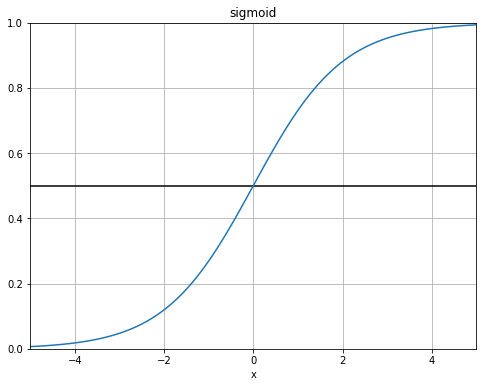

In [12]:
plt.figure(figsize=(8,6))
plt.plot(x, sigmoid(x),label='sigmoid')
plt.hlines([0.5], -5, 5, "black", linestyle='solid' )
plt.xlabel('x')
plt.grid()
plt.ylim([0,1])
plt.xlim([-5,5])
plt.title('sigmoid')
plt.savefig('sigmoid.png')

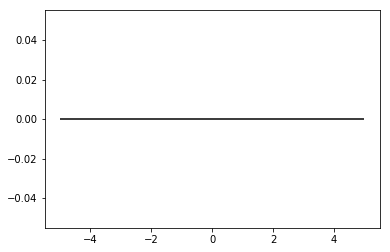

In [9]:
plt.hlines([0], -5,5,'black', linestyle='solid')

In [1]:
import numpy as np 

In [33]:
np.append?

In [39]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

class LogisticRegression():
    
    def __init__(self, eta=0.1, num_iter=50):
        self.eta = eta 
        self.num_iter = num_iter
    
    def fit(self, X, t):
        """
        inputs: 
            X : 2-d array. shape: [N, d].
                N : the number of data.  
                d:  the number of features.
            t : 1-d array. shape: [N].
                the desired values
        """
        n_features = X.shape[1]+1
        X = np.append(X, np.ones(shape=[X.shape[0],1]),axis=1)
        self.w = np.random.randn(1,n_features)
        # predict the value
        for i in range(self.num_iter):
            y_hat = sigmoid(np.dot(X, self.w.reshape(-1,1)))  # --> [N, 1]
            grad = self.calculate_grad(X, y_hat, t)
            self.w -= self.eta * grad 
    
    def calculate_grad(self, X, y_hat, t):
        d_y_hat = 2*(y_hat - t.reshape(-1,1)) # -> [N, 1]
        d_xomega = (1 - y_hat)* y_hat  # -> [N, 1]
        d_omega = X # -> [N, d]
        return np.dot((d_y_hat*d_xomega).T, d_omega) 
        
    def pred(self, X):
        X = np.append(X, np.ones(shape=[X.shape[0],1]),axis=1)
        return sigmoid(np.dot(X, self.w.reshape(-1,1))).flatten()
        
        
        
        
        
        

In [72]:
def truef(X):
    return 1.5* X[:, 0] -  X[:, 1] -1.0


In [100]:
X = np.random.randn(50, 2)
t = np.where(truef(X)>0.0, 1.0, 0.0)
logit = LogisticRegression(eta=1.0, num_iter=100)

In [101]:
logit.fit(X, t)

In [102]:
pred = logit.pred(X)

In [103]:
pred>0.5

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False])

In [104]:
t

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [105]:
import matplotlib.pyplot as plt 

In [126]:
logit.w

array([[ 9.59791622, -5.9564076 , -5.47246126]])

In [122]:
X[np.where(t==1)][:, 0]

array([1.57276452, 2.15483553, 0.56838539, 1.38822515, 0.10258675,
       1.09902894, 0.37292234, 1.82587589, 0.69154821, 0.42656632,
       1.58117513])

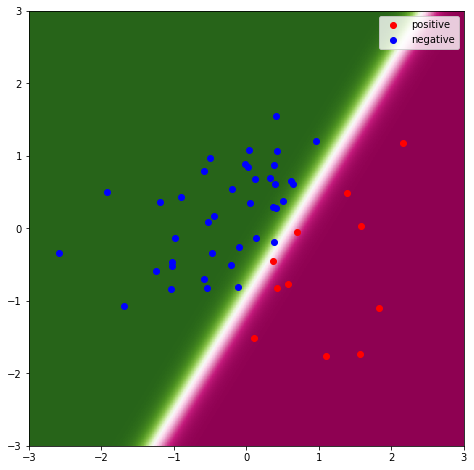

In [125]:
# 図を描くための準備
seq = np.arange(-3, 3, 0.01)
X_1, X_2 = np.meshgrid(seq, seq)
X_1, X_2 = X_1.reshape(-1,1), X_2.reshape(-1,1)
X_all = np.concatenate([X_1,X_2],axis=1)
X_all = X_all.reshape(600,600, 2)
zlist = np.zeros([600,600])
for i in range(600):
    zlist[i,:] = logit.pred(X_all[i, :, :])
# 散布図と予測分布を描画

plt.figure(figsize=(12,8))
plt.imshow(zlist, extent=[-3,3,-3,3], origin='lower', cmap=plt.cm.PiYG_r)
plt.scatter(X[np.where(t==1)][:, 0],X[np.where(t==1)][:, 1], color='red', label='positive')
plt.scatter(X[np.where(t==0)][:, 0],X[np.where(t==0)][:, 1], color='blue', label='negative')
plt.legend()  
plt.show()

In [113]:
X[3]

array([0.4024895 , 0.28296786])

In [110]:
X[0].shape

(2,)

In [111]:
X[np.where(t==1)]

array([[ 1.57276452, -1.73509153],
       [ 2.15483553,  1.1740161 ],
       [ 0.56838539, -0.76779379],
       [ 1.38822515,  0.4933499 ],
       [ 0.10258675, -1.50655898],
       [ 1.09902894, -1.75446746],
       [ 0.37292234, -0.44972639],
       [ 1.82587589, -1.09529916],
       [ 0.69154821, -0.04883021],
       [ 0.42656632, -0.82437449],
       [ 1.58117513,  0.03245148]])

In [97]:
X[np.where(t==0)]

array([[-6.90174740e-01,  1.69894418e-01],
       [ 5.18902283e-01, -1.49340707e-01],
       [ 1.46173789e-01,  5.41317935e-01],
       [-5.41451033e-01, -8.27180699e-01],
       [ 8.56494403e-01,  3.10457870e-01],
       [-5.06150587e-01,  1.36365374e+00],
       [-5.29742710e-01, -5.44839133e-01],
       [-6.37789813e-01,  1.37690320e+00],
       [-2.41627220e+00, -1.54880546e+00],
       [ 6.07171679e-01,  2.96584155e-02],
       [ 9.50979705e-01,  1.91456636e+00],
       [-7.02407184e-01,  5.31072937e-01],
       [ 7.65341556e-03, -9.33207677e-01],
       [-7.20431538e-01, -1.08331673e+00],
       [-1.63272227e-01, -6.71752388e-01],
       [-1.34159525e-01, -5.23022596e-01],
       [ 6.38635729e-01,  1.23508208e+00],
       [-7.64706160e-02,  1.80630009e-01],
       [-2.44250833e-03,  9.94552638e-01],
       [ 7.66122464e-01,  3.68641571e-01],
       [-9.28727786e-01, -9.49299716e-02],
       [ 4.04372296e-01,  6.92732344e-01],
       [-1.76769933e+00, -1.39000823e-01],
       [ 4.